<a href="https://colab.research.google.com/github/anchalchepurwar/HandwrittingRecognition/blob/main/DL_Practical_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/archive (3).zip" -d /content/devanagari_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/027_03.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/028_01.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/028_02.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/028_03.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/028_04.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/028_05.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/029_01.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/030_01.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/030_02.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/030_03.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/030_04.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhcd/numerals/1/032_01.jpg  
  inflating: /content/devanagari_dataset/nhcd/nhc

In [ ]:
import os

base_path = "/content/devanagari_dataset"

for root, dirs, files in os.walk(base_path, topdown=True):
    print(root, "->", len(files), "files")

/content/devanagari_dataset -> 1 files
/content/devanagari_dataset/test -> 0 files
/content/devanagari_dataset/test/test -> 0 files
/content/devanagari_dataset/nhcd -> 0 files
/content/devanagari_dataset/nhcd/nhcd -> 0 files
/content/devanagari_dataset/nhcd/nhcd/vowels -> 0 files
/content/devanagari_dataset/nhcd/nhcd/vowels/9 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/7 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/4 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/10 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/6 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/2 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/8 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/5 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/1 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/12 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/11 -> 221 files
/content/devanagari_dataset/nhcd/nhcd/vowels/3 -> 221 fi

In [ ]:
base_dir = "/content/devanagari_dataset/nhcd/nhcd"

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [ ]:
import os, shutil
from glob import glob

base_path = "/content/devanagari_dataset/nhcd/nhcd"
train_path = "/content/devanagari_dataset/train"

os.makedirs(train_path, exist_ok=True)

# Copy all class folders (vowels, numerals, consonants) to one place
for category in ["vowels", "numerals", "consonants"]:
    src = os.path.join(base_path, category)
    dst = os.path.join(train_path, category)
    shutil.copytree(src, dst, dirs_exist_ok=True)

print("✅ Combined vowels, numerals, consonants into train/")


✅ Combined vowels, numerals, consonants into train/


In [ ]:
!find /content/devanagari_dataset/train -type d -maxdepth 2

find: warning: you have specified the global option -maxdepth after the argument -type, but global options are not positional, i.e., -maxdepth affects tests specified before it as well as those specified after it.  Please specify global options before other arguments.
/content/devanagari_dataset/train
/content/devanagari_dataset/train/vowels
/content/devanagari_dataset/train/vowels/9
/content/devanagari_dataset/train/vowels/7
/content/devanagari_dataset/train/vowels/4
/content/devanagari_dataset/train/vowels/10
/content/devanagari_dataset/train/vowels/6
/content/devanagari_dataset/train/vowels/2
/content/devanagari_dataset/train/vowels/8
/content/devanagari_dataset/train/vowels/5
/content/devanagari_dataset/train/vowels/1
/content/devanagari_dataset/train/vowels/12
/content/devanagari_dataset/train/vowels/11
/content/devanagari_dataset/train/vowels/3
/content/devanagari_dataset/train/numerals
/content/devanagari_dataset/train/numerals/9
/content/devanagari_dataset/train/numerals/7
/con

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # use 20% for validation
)

train_gen = train_datagen.flow_from_directory(
    '/content/devanagari_dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    '/content/devanagari_dataset/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10330 images belonging to 4 classes.
Found 2582 images belonging to 4 classes.


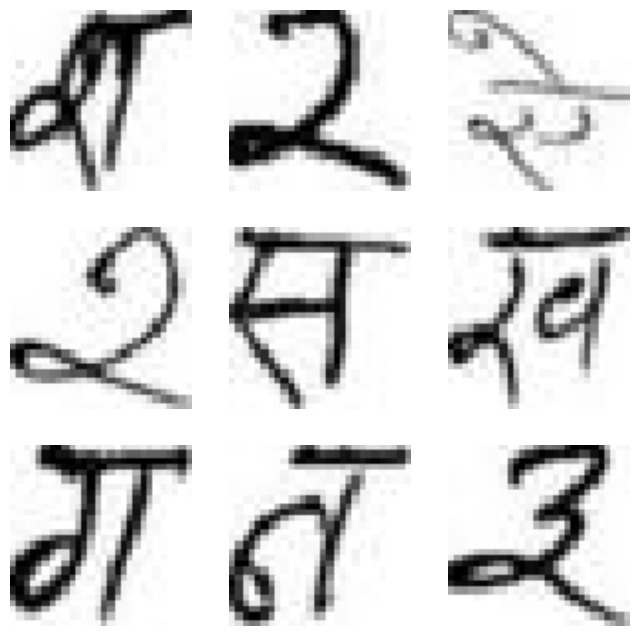

In [ ]:
import matplotlib.pyplot as plt

x_batch, y_batch = next(train_gen)
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [ ]:
#Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# 1) Paths & params
base_train_dir = '/content/devanagari_dataset/train'
img_size = (64, 64)
batch_size = 32
seed = 42
epochs = 100

# sanity check
if not os.path.exists(base_train_dir):
    raise FileNotFoundError(f"{base_train_dir} not found. Update the path.")

In [ ]:
# 2) Data generators (use validation_split to create val set) ===
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.20
)

# training generator
train_gen = train_datagen.flow_from_directory(
    base_train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=seed
)

# validation generator (shuffle=False so predictions align to labels)
val_gen = train_datagen.flow_from_directory(
    base_train_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=seed
)

num_classes = train_gen.num_classes
class_indices = train_gen.class_indices
idx_to_class = {v:k for k,v in class_indices.items()}
print("\nDetected classes:", num_classes)
print("class_indices (name -> idx):", class_indices)

# === utility to get full validation labels (aligned) ===
val_steps = int(np.ceil(val_gen.samples / val_gen.batch_size))

Found 10330 images belonging to 4 classes.
Found 2582 images belonging to 4 classes.

Detected classes: 4
class_indices (name -> idx): {'consonants': 0, 'numerals': 1, 'test': 2, 'vowels': 3}


In [ ]:
# 3) Build MLP model
mlp = Sequential([
    Flatten(input_shape=(img_size[0], img_size[1], 1)),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

print("\nTraining MLP...")
history_mlp = mlp.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,728,324 (18.04 MB)

 Trainable params: 4,725,252 (18.03 MB)

 Non-trainable params: 3,072 (12.00 KB)


Training MLP...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


323/323 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.6265 - loss: 1.1419 - val_accuracy: 0.6317 - val_loss: 1.4655
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7976 - loss: 0.5539 - val_accuracy: 0.5662 - val_loss: 1.6225
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8217 - loss: 0.4577 - val_accuracy: 0.6247 - val_loss: 1.2316
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8250 - loss: 0.4343 - val_accuracy: 0.5895 - val_loss: 1.5080
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.8488 - loss: 0.3951 - val_accuracy: 0.5763 - val_loss: 1.2461
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8464 - loss: 0.3995 - val_accuracy: 0.5879 - val_loss: 1.3957
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8466 - loss: 0.3970 - val_accuracy: 0.6623 - val_loss: 0.9505
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8443 - loss: 0.3938 - val_accurac

In [ ]:
# === 4) Evaluate MLP on validation set and produce predictions ===
val_gen.reset()
y_pred_proba_mlp = mlp.predict(val_gen, steps=val_steps, verbose=1)
y_pred_mlp = np.argmax(y_pred_proba_mlp, axis=1)
y_true = val_gen.classes  # because shuffle=False

mlp_acc = np.mean(y_pred_mlp == y_true)
print(f"\nMLP Validation Accuracy: {mlp_acc:.4f}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step

MLP Validation Accuracy: 0.6286


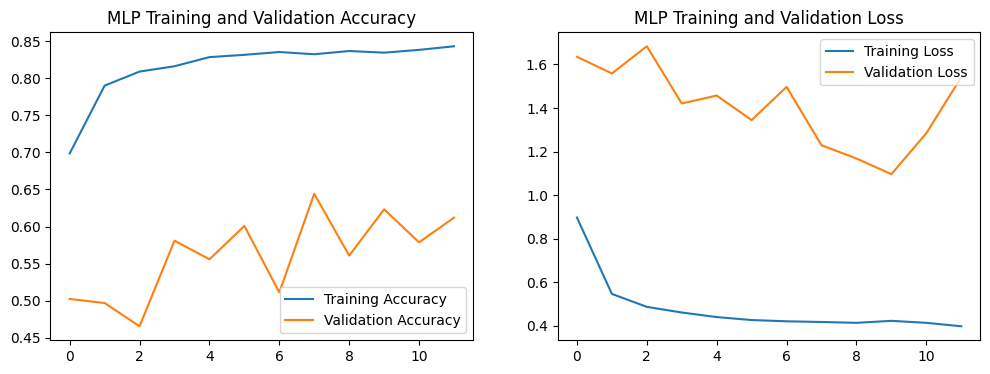

In [ ]:
# 5) Visualize training history
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.show()

plot_training_history(history_mlp, "MLP")

In [ ]:
# 5) Build CNN model ===
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size[0], img_size[1], 1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.2),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(train_gen.num_classes, activation='softmax') # Use train_gen.num_classes
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

print("\nTraining CNN...")
# reinitialize train_gen because it may be exhausted
train_gen = train_datagen.flow_from_directory(
    base_train_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', subset='training', seed=seed,
    classes=[d for d in os.listdir(base_train_dir) if os.path.isdir(os.path.join(base_train_dir, d)) and d != 'test'] # Exclude 'test' directory
)
val_gen = train_datagen.flow_from_directory(
    base_train_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', subset='validation', shuffle=False, seed=seed,
    classes=[d for d in os.listdir(base_train_dir) if os.path.isdir(os.path.join(base_train_dir, d)) and d != 'test'] # Exclude 'test' directory
)

num_classes = train_gen.num_classes # Update num_classes after generating data
class_indices = train_gen.class_indices # Update class_indices after generating data
idx_to_class = {v:k for k,v in class_indices.items()} # Update idx_to_class after generating data
print("\nDetected classes:", num_classes)
print("class_indices (name -> idx):", class_indices)

# === utility to get full validation labels (aligned) ===
val_steps = int(np.ceil(val_gen.samples / val_gen.batch_size))

history_cnn = cnn.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    verbose=1
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,192,771 (8.36 MB)

 Trainable params: 2,191,811 (8.36 MB)

 Non-trainable params: 960 (3.75 KB)


Training CNN...
Found 10330 images belonging to 3 classes.
Found 2582 images belonging to 3 classes.

Detected classes: 3
class_indices (name -> idx): {'vowels': 0, 'numerals': 1, 'consonants': 2}
Epoch 1/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.7103 - loss: 0.8177 - val_accuracy: 0.3331 - val_loss: 29.5735
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8717 - loss: 0.3281 - val_accuracy: 0.6774 - val_loss: 1.9299
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.8943 - loss: 0.2649 - val_accuracy: 0.6522 - val_loss: 1.0379
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9174 - loss: 0.2188 - val_accuracy: 0.7971 - val_loss: 0.8057
Epoch 5/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9307 - loss: 0.1868 - val_accuracy: 0.5918 - val_loss: 2.9081
Epoch 6/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9355 - loss: 0.1723 - val_accuracy: 0.7626 - val_loss: 0.8663
Epoch 7/100
323

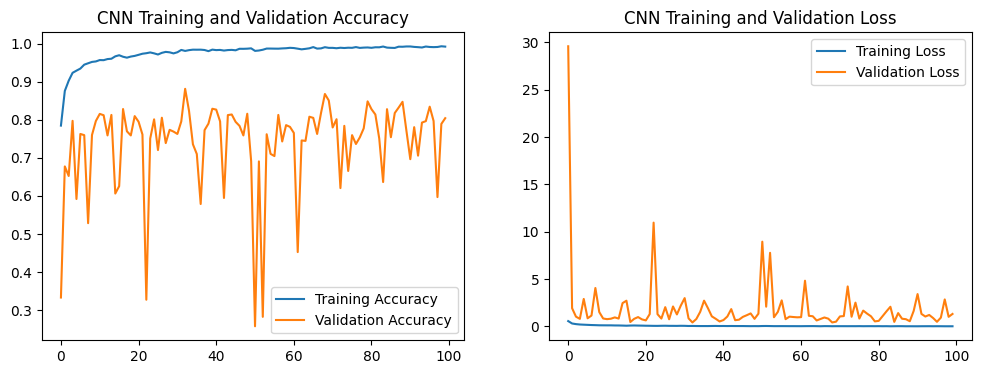

In [ ]:
# 5) Visualize training history
def plot_training_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(epochs)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} Training and Validation Loss')
    plt.show()

plot_training_history(history_cnn, "CNN")

In [ ]:
# 6) Evaluate CNN on validation set and produce predictions ===
val_gen.reset()
y_pred_proba_cnn = cnn.predict(val_gen, steps=val_steps, verbose=1)
y_pred_cnn = np.argmax(y_pred_proba_cnn, axis=1)
y_true = val_gen.classes

cnn_acc = np.mean(y_pred_cnn == y_true)
print(f"\nCNN Validation Accuracy: {cnn_acc:.4f}")
print("\nCNN Classification Report:")
print(classification_report(y_true, y_pred_cnn, target_names=[idx_to_class[i] for i in range(num_classes)]))

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step

CNN Validation Accuracy: 0.8114

CNN Classification Report:
              precision    recall  f1-score   support

      vowels       0.81      0.88      0.84       530
    numerals       0.95      0.48      0.63       576
  consonants       0.79      0.92      0.85      1476

    accuracy                           0.81      2582
   macro avg       0.85      0.76      0.78      2582
weighted avg       0.83      0.81      0.80      2582



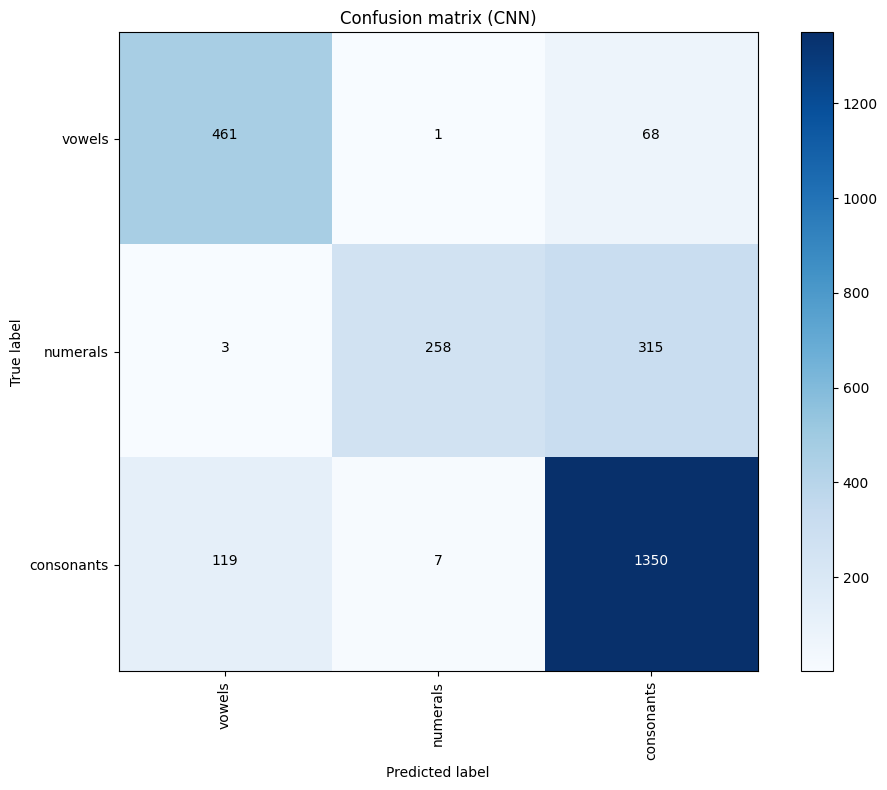

In [ ]:
#  8) Confusion matrix for CNN
cm = confusion_matrix(y_true, y_pred_cnn)
labels = [idx_to_class[i] for i in range(num_classes)]

plt.figure(figsize=(10,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix (CNN)')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

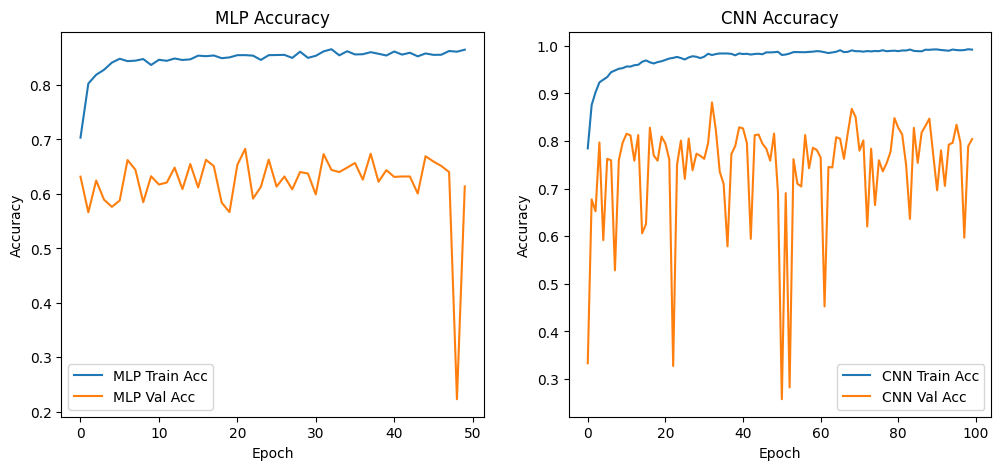


Final comparison -> MLP val acc: 0.6286 | CNN val acc: 0.8013


In [ ]:
# === 7) Compare & plot accuracy curves ===
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mlp.history['accuracy'], label='MLP Train Acc')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Val Acc')
plt.title('MLP Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.title('CNN Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.show()

print(f"\nFinal comparison -> MLP val acc: {mlp_acc:.4f} | CNN val acc: {cnn_acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


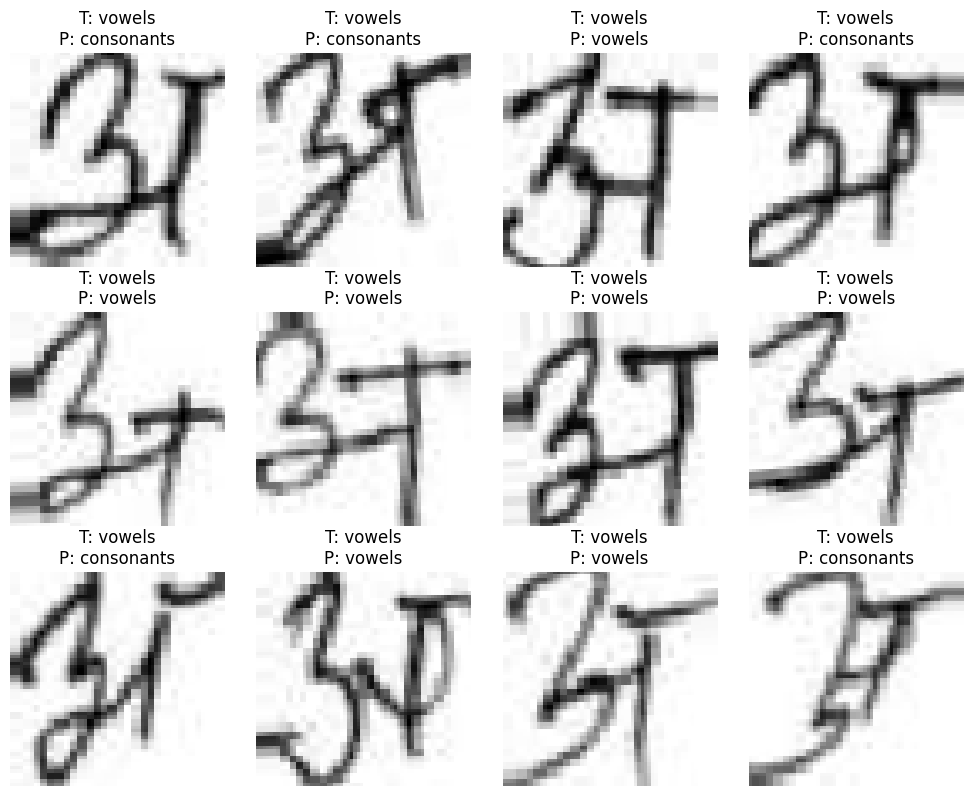

In [ ]:
#  9) Show a few example predictions (CNN)
val_gen.reset()
x_val_batch, y_val_batch = next(val_gen)   # first batch from validation
preds = cnn.predict(x_val_batch)
pred_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_val_batch, axis=1)

plt.figure(figsize=(10,8))
for i in range(min(12, x_val_batch.shape[0])):
    plt.subplot(3,4,i+1)
    img = x_val_batch[i].squeeze()
    plt.imshow(img, cmap='gray')
    plt.title(f"T: {idx_to_class[true_classes[i]]}\nP: {idx_to_class[pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# === Save the CNN model ===
cnn.save("/content/cnn_devanagari_model.h5")
print("CNN model saved successfully!")

# === Save the MLP model ===
mlp.save("/content/mlp_devanagari_model.h5")
print("MLP model saved successfully!")


CNN model saved successfully!
MLP model saved successfully!


In [ ]:
from google.colab import files
files.download("/content/cnn_devanagari_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>